# Single Layer LSTM

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIQSVOT/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIQSVOT/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIQSVOT/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))


In [36]:
tokenizer.vocab_size

8185

In [5]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
                             tf.keras.layers.LSTM(64),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
NUM_EPOCHS= 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 91s 233ms/step - loss: 0.6933 - accuracy: 0.5026 - val_loss: 0.6930 - val_accuracy: 0.5025
Epoch 2/10
391/391 [==============================] - 89s 227ms/step - loss: 0.6927 - accuracy: 0.5024 - val_loss: 0.6931 - val_accuracy: 0.5024
Epoch 3/10
391/391 [==============================] - 89s 227ms/step - loss: 0.6913 - accuracy: 0.5040 - val_loss: 0.6935 - val_accuracy: 0.5002
Epoch 4/10
391/391 [==============================] - 88s 226ms/step - loss: 0.6892 - accuracy: 0.5060 - val_loss: 0.6935 - val_accuracy: 0.5024
Epoch 5/10
391/391 [==============================] - 88s 224ms/step - loss: 0.6874 - accuracy: 0.4964 - val_loss: 0.6953 - val_accuracy: 0.5020
Epoch 6/10
391/391 [==============================] - 88s 224ms/step - loss: 0.6856 - accuracy: 0.5058 - val_loss: 0.6939 - val_accuracy: 0.5008
Epoch 7/10
391/391 [==============================] - 88s 224ms/step - loss: 0.6852 - accuracy: 0.5015 - val_loss: 0.6948 - val_ac

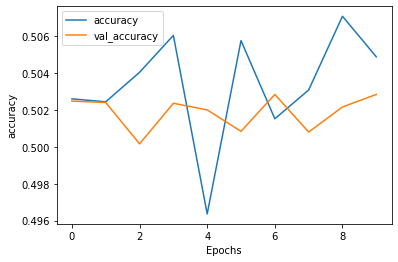

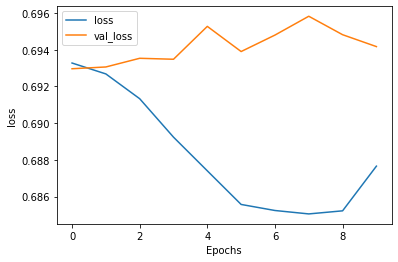

In [8]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
NUM_EPOCHS= 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 163s 417ms/step - loss: 0.5335 - accuracy: 0.7315 - val_loss: 0.4471 - val_accuracy: 0.8111
Epoch 2/10
391/391 [==============================] - 161s 413ms/step - loss: 0.3346 - accuracy: 0.8666 - val_loss: 0.3773 - val_accuracy: 0.8411
Epoch 3/10
391/391 [==============================] - 163s 418ms/step - loss: 0.2827 - accuracy: 0.8928 - val_loss: 0.3984 - val_accuracy: 0.8458
Epoch 4/10
391/391 [==============================] - 164s 418ms/step - loss: 0.2154 - accuracy: 0.9200 - val_loss: 0.3952 - val_accuracy: 0.8408
Epoch 5/10
391/391 [==============================] - 160s 410ms/step - loss: 0.2837 - accuracy: 0.8838 - val_loss: 0.4868 - val_accuracy: 0.8319
Epoch 6/10
391/391 [==============================] - 161s 413ms/step - loss: 0.1980 - accuracy: 0.9266 - val_loss: 0.4598 - val_accuracy: 0.8283
Epoch 7/10
391/391 [==============================] - 161s 412ms/step - loss: 0.1333 - accuracy: 0.9535 - val_loss: 0.5771 -

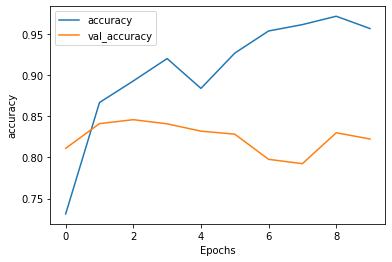

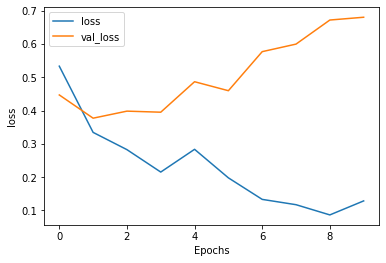

In [17]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
NUM_EPOCHS= 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 326s 834ms/step - loss: 0.5182 - accuracy: 0.7441 - val_loss: 0.4605 - val_accuracy: 0.8047
Epoch 2/10
391/391 [==============================] - 323s 826ms/step - loss: 0.3977 - accuracy: 0.8336 - val_loss: 0.5046 - val_accuracy: 0.7517
Epoch 3/10
391/391 [==============================] - 318s 813ms/step - loss: 0.3172 - accuracy: 0.8736 - val_loss: 0.4361 - val_accuracy: 0.8368
Epoch 4/10
391/391 [==============================] - 316s 809ms/step - loss: 0.2411 - accuracy: 0.9084 - val_loss: 0.4288 - val_accuracy: 0.8028
Epoch 5/10
391/391 [==============================] - 314s 803ms/step - loss: 0.2466 - accuracy: 0.9067 - val_loss: 0.4890 - val_accuracy: 0.7898
Epoch 6/10
391/391 [==============================] - 316s 807ms/step - loss: 0.1728 - accuracy: 0.9378 - val_loss: 0.5183 - val_accuracy: 0.7872
Epoch 7/10
391/391 [==============================] - 316s 808ms/step - loss: 0.1303 - accuracy: 0.9542 - val_loss: 0.5490 -

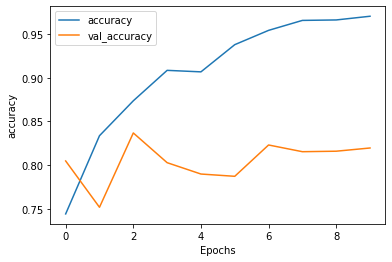

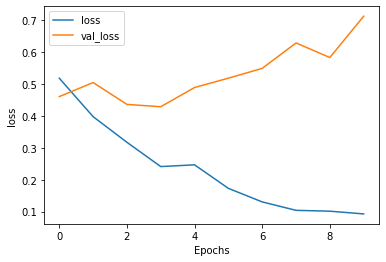

In [24]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAvgPool1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
NUM_EPOCHS= 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 47s 121ms/step - loss: 0.4480 - accuracy: 0.7799 - val_loss: 0.3153 - val_accuracy: 0.8760
Epoch 2/10
391/391 [==============================] - 29s 74ms/step - loss: 0.2238 - accuracy: 0.9166 - val_loss: 0.3053 - val_accuracy: 0.8787
Epoch 3/10
391/391 [==============================] - 26s 65ms/step - loss: 0.1708 - accuracy: 0.9378 - val_loss: 0.3352 - val_accuracy: 0.8734
Epoch 4/10
391/391 [==============================] - 24s 62ms/step - loss: 0.1366 - accuracy: 0.9506 - val_loss: 0.3698 - val_accuracy: 0.8709
Epoch 5/10
391/391 [==============================] - 24s 60ms/step - loss: 0.1092 - accuracy: 0.9634 - val_loss: 0.4560 - val_accuracy: 0.8584
Epoch 6/10
391/391 [==============================] - 23s 58ms/step - loss: 0.0881 - accuracy: 0.9698 - val_loss: 0.5002 - val_accuracy: 0.8610
Epoch 7/10
391/391 [==============================] - 23s 59ms/step - loss: 0.0719 - accuracy: 0.9756 - val_loss: 0.5960 - val_accuracy

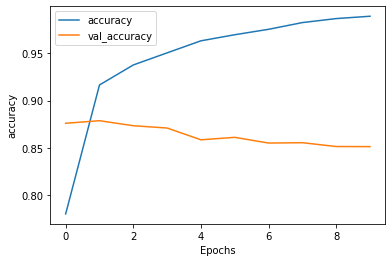

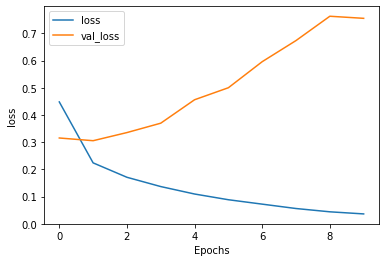

In [27]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [29]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_4 (Bidirection (None, None, 128)         49920     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               74496     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 656,577
Trainable params: 656,577
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
NUM_EPOCHS= 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 328s 839ms/step - loss: 0.6021 - accuracy: 0.6670 - val_loss: 0.5441 - val_accuracy: 0.7365
Epoch 2/10
391/391 [==============================] - ETA: 0s - loss: 0.3556 - accuracy: 0.8510

KeyboardInterrupt: ignored